In [152]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


In [153]:
df=pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')

In [154]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score

from sklearn import metrics
from collections import Counter

In [155]:
raw_df = pd.read_csv('../input/creditcardfraud/creditcard.csv')

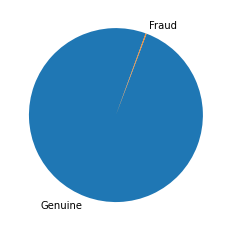

In [156]:
labels=["Genuine","Fraud"]

fraud_or_not = raw_df["Class"].value_counts().tolist()
values = [fraud_or_not[0], fraud_or_not[1]]
plt.pie(values, labels = labels,startangle=70)
plt.show() 


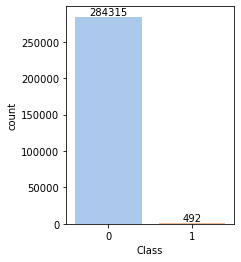

In [157]:
plt.figure(figsize=(3,4))
ax = sns.countplot(x='Class',data=raw_df,palette="pastel")
for i in ax.containers:
    ax.bar_label(i,)

In [158]:
print('Genuine:', round(raw_df['Class'].value_counts()[0]/len(raw_df) * 100,2), '% of the dataset')
print('Frauds:', round(raw_df['Class'].value_counts()[1]/len(raw_df) * 100,2), '% of the dataset')

Genuine: 99.83 % of the dataset
Frauds: 0.17 % of the dataset


In [159]:
df = raw_df.copy()

df.drop_duplicates(inplace=True)
print("Duplicated values dropped succesfully")
print("*" * 100)

Duplicated values dropped succesfully
****************************************************************************************************


In [160]:
df = df.drop('Time', axis=1)

In [161]:
numeric_columns = (list(df.loc[:, 'V1':'Amount']))

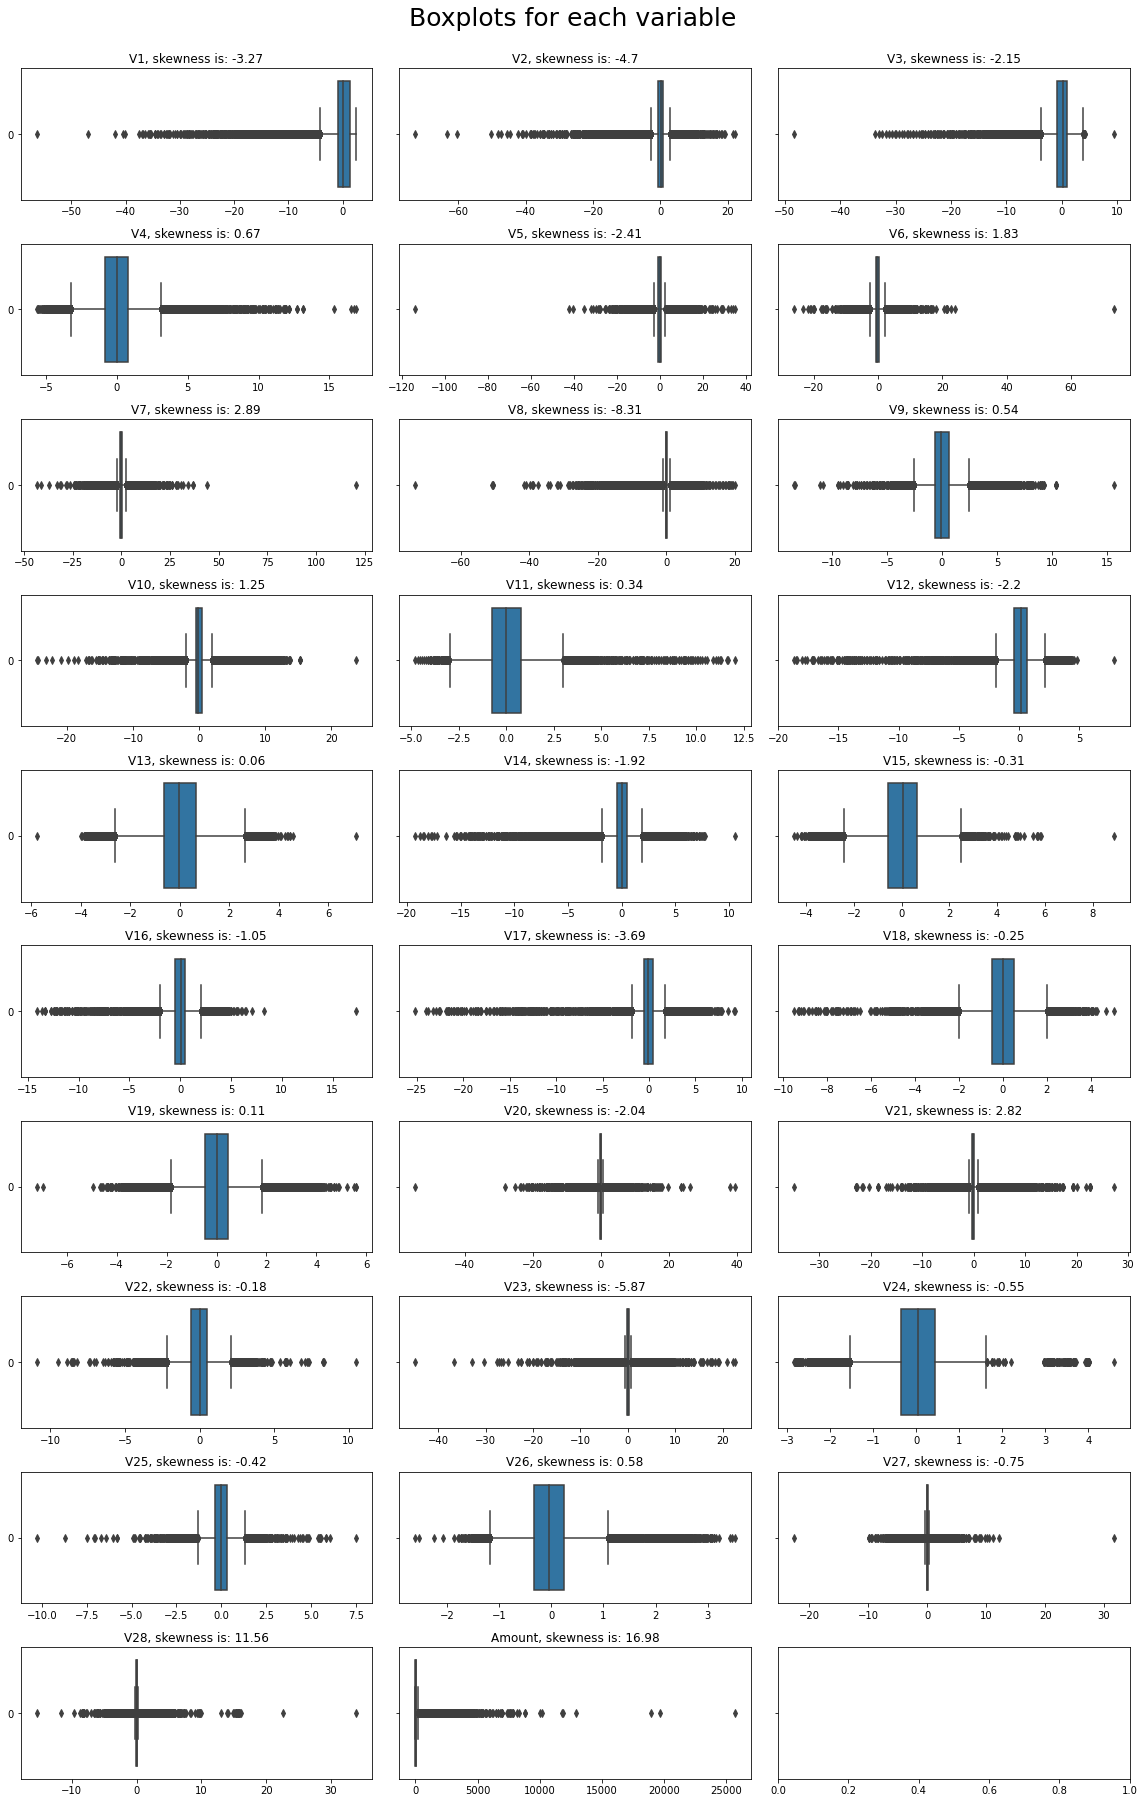

In [162]:
def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(16,25))
    fig.suptitle(suptitle,y=1, size=25)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.boxplot(data=dataset[data], orient='h', ax=axs[i])
        axs[i].set_title(data + ', skewness is: '+str(round(dataset[data].skew(axis = 0, skipna = True),2)))
        
boxplots_custom(dataset=df, columns_list=numeric_columns, rows=10, cols=3, suptitle='Boxplots for each variable')
plt.tight_layout()

In [163]:
def IQR_method (df,n,features):
    outlier_list = []
    
    for column in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[column], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[column],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        # outlier step
        outlier_step = 1.5 * IQR
        # Determining a list of indices of outliers
        outlier_list_column = df[(df[column] < Q1 - outlier_step) | (df[column] > Q3 + outlier_step )].index
        # appending the list of outliers 
        outlier_list.extend(outlier_list_column)
        
    # selecting observations containing more than x outliers
    outlier_list = Counter(outlier_list)        
    multiple_outliers = list( k for k, v in outlier_list.items() if v > n )
    
    # Calculate the number of records below and above lower and above bound value respectively
    out1 = df[df[column] < Q1 - outlier_step]
    out2 = df[df[column] > Q3 + outlier_step]
    
    print('Total number of deleted outliers is:', out1.shape[0]+out2.shape[0])
    
    return multiple_outliers

In [164]:
# detecting outliers
Outliers_IQR = IQR_method(df,1,numeric_columns)

# dropping outliers
df_out = df.drop(Outliers_IQR, axis = 0).reset_index(drop=True)

Total number of deleted outliers is: 31685


In [165]:
X = df.drop('Class', axis=1)
y = df['Class']

In [166]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.3, random_state = 42)

In [167]:
from sklearn.preprocessing import StandardScaler

# Creating function for scaling
def Standard_Scaler (df, col_names):
    features = df[col_names]
    scaler = StandardScaler().fit(features.values)
    features = scaler.transform(features.values)
    df[col_names] = features
    
    return df

In [168]:
col_names = ['Amount']
X_train = Standard_Scaler (X_train, col_names)
X_test = Standard_Scaler (X_test, col_names)

In [169]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100)

# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

# performing predictions on the test dataset
y_pred = clf.predict(X_test)

# metrics are used to find accuracy or error
from sklearn import metrics
print()

# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))


ACCURACY OF THE MODEL:  0.9995418125425879


In [170]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf # tensorflow, a deep learning framework
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [171]:
tf.test.is_gpu_available()

False

In [172]:
X = raw_df.drop('Class', axis=1)
y = raw_df['Class']

In [173]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.3, random_state = 42)

In [174]:
model = tf.keras.models.Sequential([
    
  tf.keras.layers.Dense(15, activation='tanh'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(15, activation='tanh'),
  tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='gelu'),
    tf.keras.layers.Dense(10, activation='selu'),
    tf.keras.layers.Dense(3, activation='gelu'),
    tf.keras.layers.Dense(3, activation='selu'),
    
  tf.keras.layers.Dense(1, activation='sigmoid')
])

In [175]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy','AUC'])

In [176]:
model.fit(X_train,y_train,validation_split = 0.20, batch_size = 1024, epochs = 10)

Epoch 1/10
156/156 [==============================] - 3s 8ms/step - loss: 0.1564 - accuracy: 0.9863 - auc: 0.4969 - val_loss: 0.0139 - val_accuracy: 0.9981 - val_auc: 0.4997
Epoch 2/10
156/156 [==============================] - 1s 6ms/step - loss: 0.0158 - accuracy: 0.9983 - auc: 0.4998 - val_loss: 0.0146 - val_accuracy: 0.9981 - val_auc: 0.4998
Epoch 3/10
156/156 [==============================] - 1s 6ms/step - loss: 0.0144 - accuracy: 0.9983 - auc: 0.5122 - val_loss: 0.0149 - val_accuracy: 0.9981 - val_auc: 0.4998
Epoch 4/10
156/156 [==============================] - 1s 6ms/step - loss: 0.0138 - accuracy: 0.9983 - auc: 0.5062 - val_loss: 0.0148 - val_accuracy: 0.9981 - val_auc: 0.4998
Epoch 5/10
156/156 [==============================] - 1s 7ms/step - loss: 0.0137 - accuracy: 0.9983 - auc: 0.5127 - val_loss: 0.0147 - val_accuracy: 0.9981 - val_auc: 0.4999
Epoch 6/10
156/156 [==============================] - 1s 8ms/step - loss: 0.0138 - accuracy: 0.9983 - auc: 0.4944 - val_loss: 0.01

In [177]:
yhat = model.predict(X_test)

In [178]:
np.unique(yhat)

array([0.00113687, 0.00113693, 0.00113696, 0.00113699, 0.00113702,
       0.00113705, 0.00113723, 0.00113726, 0.00113744, 0.0011375 ,
       0.001138  , 0.00113827, 0.0011386 , 0.00113863, 0.00113893,
       0.00113973, 0.001142  , 0.00114256, 0.00114471, 0.00114641,
       0.00114784, 0.00115436, 0.00115615, 0.00119746, 0.00122371,
       0.00122654, 0.00123802, 0.00125098, 0.00126934, 0.00127545,
       0.00128356, 0.00128698, 0.00128865, 0.00129223, 0.00130045,
       0.00130257, 0.00130722, 0.00130808, 0.0013082 , 0.00130826,
       0.00130829, 0.00130865, 0.00130874, 0.00131115, 0.00131461,
       0.00132447, 0.00133941, 0.00140592, 0.00153148, 0.0015845 ,
       0.00162748, 0.00163037, 0.00174975, 0.00177151, 0.00186592,
       0.0019725 , 0.00210461, 0.00210953, 0.00231361, 0.00262901,
       0.00271544, 0.00274095, 0.00274116, 0.0027439 , 0.00274396,
       0.00274476, 0.00275537, 0.0027889 , 0.0029991 , 0.00302118,
       0.00336143, 0.00338587, 0.00420958, 0.00424346, 0.00428

In [179]:
ypre=[]
for i in range(len(yhat)):
    if(yhat[i]>-0.5):
        ypre.append(0)
    else:
        ypre.append(1)

In [180]:
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, ypre))

ACCURACY OF THE MODEL:  0.9982678510820079
